<a href="https://colab.research.google.com/github/parijit/useful_exercises/blob/main/regression_machine_learning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [1]:
import pandas as pd
import numpy as np
import tensorflow
import xgboost
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer #for imputation
from sklearn.compose import ColumnTransformer #for encoding categoriccal variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder #for encoding dependent variable labels 
from sklearn.model_selection import train_test_split #for splitting randomly
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # for simple linear regression
from sklearn.preprocessing import PolynomialFeatures # for creating the powered features of polynomial Regression

# Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df =pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 1 - Data Preprocessing/Section 2 -------------------- Part 1 - Data Preprocessing --------------------/Python/Data.csv')

In [4]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [5]:
print(x)
print(y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


# Missing Data treatment


In [6]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean' )
imputer.fit(x[:,1:3])
x[:,1:3] =imputer.transform(x[:,1:3])

In [7]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


# Encoding Categorical Data

***Encoding independent variable***

---



In [8]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder='passthrough') 
#pass through keeps other columns intact and doesnt drops them if we dont encode

In [9]:
x = np.array(ct.fit_transform(x)) # we have force fit into array since x is already an array 

In [10]:
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


***Encoding dependent variable***

---







In [11]:
le =LabelEncoder()
y = le.fit_transform(y)

In [12]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


***Splitting Dataset***

---



In [13]:
xtrain,xtest,ytrain,ysplit =train_test_split(x,y,test_size=0.2,random_state=1)
# fix the seed so that we get values from same seed in 
#the variables so that we get the corresponding values; takes all variable randomly 

In [14]:
print(xtrain)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [15]:
print(xtest)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [16]:
print(ytrain)

[0 1 0 0 1 1 0 1]


In [17]:
print(ysplit)

[0 1]


***Feature Scaling***

---



In [18]:
sc= StandardScaler()
xtrain[:,1:3]=sc.fit_transform(xtrain[:,1:3])
xtest[:,1:3]=sc.transform(xtest[:,1:3])

In [19]:
print(xtrain)

[[0.0 -0.5773502691896258 1.2909944487358056 38.77777777777778 52000.0]
 [0.0 1.7320508075688774 -0.7745966692414834 40.0 63777.77777777778]
 [1.0 -0.5773502691896258 -0.7745966692414834 44.0 72000.0]
 [0.0 -0.5773502691896258 1.2909944487358056 38.0 61000.0]
 [0.0 -0.5773502691896258 1.2909944487358056 27.0 48000.0]
 [1.0 -0.5773502691896258 -0.7745966692414834 48.0 79000.0]
 [0.0 1.7320508075688774 -0.7745966692414834 50.0 83000.0]
 [1.0 -0.5773502691896258 -0.7745966692414834 35.0 58000.0]]


In [20]:
print(xtest)

[[0.0 1.7320508075688774 -0.7745966692414834 30.0 54000.0]
 [1.0 -0.5773502691896258 -0.7745966692414834 37.0 67000.0]]


# Simple Linear Regression


***Import Dataset***

---



In [21]:
df =pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 4 - Simple Linear Regression/Python/Salary_Data.csv')


***Splitting x and y***

---



In [22]:
x = df.iloc[:,0:1].values
y = df.iloc[:,-1].values

In [23]:
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


***Split data***

---



In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [25]:
print(x_train)

[[ 9.5]
 [ 2. ]
 [ 8.7]
 [ 7.9]
 [ 8.2]
 [ 2.2]
 [ 1.5]
 [ 9. ]
 [ 3. ]
 [ 5.9]
 [ 4.1]
 [ 3.2]
 [ 9.6]
 [ 1.3]
 [ 5.1]
 [ 1.1]
 [ 4.9]
 [10.5]
 [10.3]
 [ 3.7]
 [ 3.2]
 [ 4. ]
 [ 4. ]
 [ 2.9]]


In [26]:
print(x_test)

[[5.3]
 [7.1]
 [3.9]
 [6. ]
 [4.5]
 [6.8]]


In [27]:
print(y_train)

[116969.  43525. 109431. 101302. 113812.  39891.  37731. 105582.  60150.
  81363.  57081.  54445. 112635.  46205.  66029.  39343.  67938. 121872.
 122391.  57189.  64445.  56957.  55794.  56642.]


In [28]:
print(y_test)

[83088. 98273. 63218. 93940. 61111. 91738.]


***Training linear regression***

---



In [29]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

***Regression predicting***

---



In [30]:
y_pred = regressor.predict(x_test) #predicted values

***Visualising training set result***

---



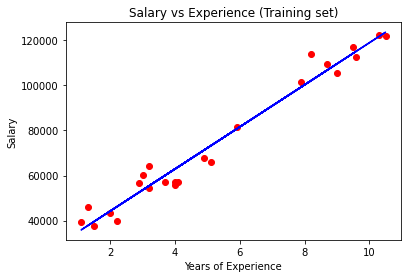

In [31]:
plt.scatter(x_train,y_train, color='red')
plt.plot(x_train,regressor.predict(x_train),color ='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

***Visualizing test set result***

---

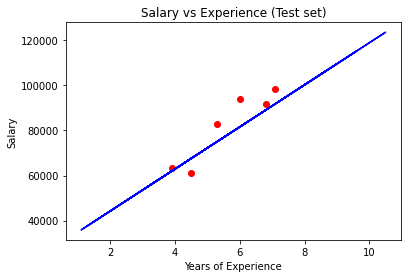

In [32]:
plt.scatter(x_test,y_test, color='red')
plt.plot(x_train,regressor.predict(x_train),color ='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [33]:
print(regressor.predict([[12]]))

[137605.23485427]



**Important note:** The value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. So:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$

In [34]:
print(regressor.coef_)
print(regressor.intercept_)

[9332.94473799]
25609.89799835482


Therefore, the equation :

$$\textrm{Salary} = 9332.94 \times \textrm{YearsExperience} + 25609.89$$

**Important Note:** To get these coefficients call "coef_" and "intercept_" attributes from regressor.


# Multiple Linear Regression


***Import Dataset***

---



In [35]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 5 - Multiple Linear Regression/Python/50_Startups.csv')

***Splitting x and y***

---



In [36]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [37]:
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[3])],remainder= 'passthrough')

In [38]:
x=np.array(ct.fit_transform(x))

In [39]:
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

***Split data***

---



In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state=1)

In [41]:
print(x_train)

[[1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [1.0 0.0 0.0 38558.51 82982.09 174999.3]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 28663.76 127056.21 201126.82]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 23640.93 96189.63 148001.11]
 [1.0 0.0 0.0 0.0 116983.8 45173.06]
 [0.0 1.0 0.0 75328.87 144135.98 134050.07]
 [0.0 1.0 0.0 73994.56 122782.75 303319.26]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 27892.92 84710.77 164470.71]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 0.0 1.0 1000.23 124153.04 1903.93]
 [0.0 0.0 1.0 77044.01 99281.34 140574.81]
 [0.0 1.0 0.0 67532.53 105751.03 304768.73]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [0.0 1.0 0.0 66051.52 182645.56 118148.2]
 [1.0 0.0 0.0 22177.74 154806.14 28334.72]
 [1.0 0.0 0.0 46426.07 157693.92 210797.67]
 [0.0 1.0 0.

In [42]:
print(x_test)

[[0.0 0.0 1.0 72107.6 127864.55 353183.81]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [1.0 0.0 0.0 28754.33 118546.05 172795.67]
 [0.0 0.0 1.0 20229.59 65947.93 185265.1]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 0.0 1.0 542.05 51743.15 0.0]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 1.0 0.0 1315.46 115816.21 297114.46]
 [0.0 0.0 1.0 61136.38 152701.92 88218.23]]


In [43]:
print(y_train)

[ 97427.84  81005.76 111313.02  90708.19 122776.86  71498.49  14681.4
 105733.54 110352.25 134307.35  77798.83 125370.37  64926.08 108552.04
 108733.99 166187.94  96778.92 132602.65  99937.59 146121.95 103282.38
  65200.33  96712.8  124266.9  118474.03 107404.34 156122.51 155752.6
  42559.73 191792.06 126992.93 192261.83 129917.04 156991.12 144259.4
 149759.96 152211.77 141585.52  69758.98  89949.14]


In [44]:
print(y_test)

[105008.31  96479.51  78239.91  81229.06 191050.39 182901.99  35673.41
 101004.64  49490.75  97483.56]


***Training linear regression***

---



In [45]:
regressor = LinearRegression()

In [46]:
regressor.fit(x_train,y_train)

LinearRegression()

***Regression predicting***

---



In [47]:
y_pred =regressor.predict(x_test)

***Checking result***

---



In [48]:
np.set_printoptions(precision =2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_pred),1)),axis=1))

[[114664.42 105008.31]
 [ 90593.16  96479.51]
 [ 75692.84  78239.91]
 [ 70221.89  81229.06]
 [179790.26 191050.39]
 [171576.92 182901.99]
 [ 49753.59  35673.41]
 [102276.66 101004.64]
 [ 58649.38  49490.75]
 [ 98272.03  97483.56]]


In [49]:
regressor.coef_

array([-2.85e+02,  2.98e+02, -1.24e+01,  7.74e-01, -9.44e-03,  2.89e-02])

In [50]:
regressor.intercept_

49834.88507322691

Therefore, the equation of our multiple linear regression model is:

Profit = -285×Dummy State 1 + 298×Dummy State 2 - 12.4×Dummy State 3 + 0.74×R&D Spend - 0.00944 ×Administration + 0.0289×Marketing Spend + 49834.88

Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [51]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[180892.25]


# Polynomial Regression

***Import Dataset***

---



In [52]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 6 - Polynomial Regression/Python/Position_Salaries.csv')

***Splitting x and y***

---



In [53]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [54]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [55]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


***Training linear regression for comparison***

---



In [56]:
regressor = LinearRegression()

In [57]:
regressor.fit(x, y)

LinearRegression()

***Training polynomial regression for comparison***

---



In [58]:
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)

LinearRegression()

***Visualizing Linear results***

---



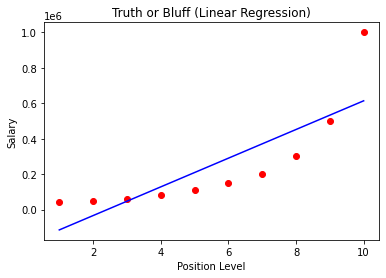

In [59]:
plt.scatter(x,y, color ='red')
plt.plot(x,regressor.predict(x),color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

***Visualizing Polynomial results***

---



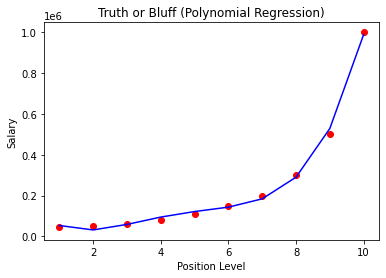

In [60]:
plt.scatter(x,y, color ='red')
plt.plot(x,lin_reg.predict(x_poly),color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

***Predicting linear Results***

---


In [61]:
regressor.predict([[6.5]])

array([330378.79])

***Prediciting Polynomial Results***

---



In [62]:
lin_reg.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45])

# Support Vector Regression (SVR)

***Import Dataset***

---



In [63]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Python/Position_Salaries.csv')

***Splitting x and y***

---



In [64]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [65]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [67]:
print(y)#standard scaler accepts 2d array so we need to convert it into 2d array by reshape

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [68]:
y= y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


***Feature Scaling***

---



In [69]:
sc_x = StandardScaler()#this calculates mean once its fitted to one column it 
#will calculate its mean and use it. as the mean of two diff column will be different so we will have to create two standard scaler vectors
sc_y = StandardScaler()
x= sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

In [70]:
print(x)

[[-1.57]
 [-1.22]
 [-0.87]
 [-0.52]
 [-0.17]
 [ 0.17]
 [ 0.52]
 [ 0.87]
 [ 1.22]
 [ 1.57]]


In [72]:
print(y)

[[-0.72]
 [-0.7 ]
 [-0.67]
 [-0.6 ]
 [-0.49]
 [-0.35]
 [-0.17]
 [ 0.18]
 [ 0.88]
 [ 2.64]]


***Training linear regression***

---



***Regression predicting***

---



***Visualizing result***

---



# Decision Tree

***Import Dataset***

---



***Splitting x and y***

---



***Split data***

---



***Training linear regression***

---



***Regression predicting***

---



***Checking result***

---



# Random Forest Regression

***Import Dataset***

---



***Splitting x and y***

---



***Split data***

---



***Training linear regression***

---



***Regression predicting***

---



***Checking result***

---



# Evaluating Regression Models

# Regression Model Selection